In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline

from rubin_scheduler.utils import int_binned_stat


In [2]:
baseline_file = get_baseline() #'/Users/yoachim/runs34/long_gaps/all_long_v3.4_10yrs.db' # get_baseline()
name = os.path.basename(baseline_file).replace('.db','')
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)

In [3]:
# should add a little summary metric that is mean per sq degree

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


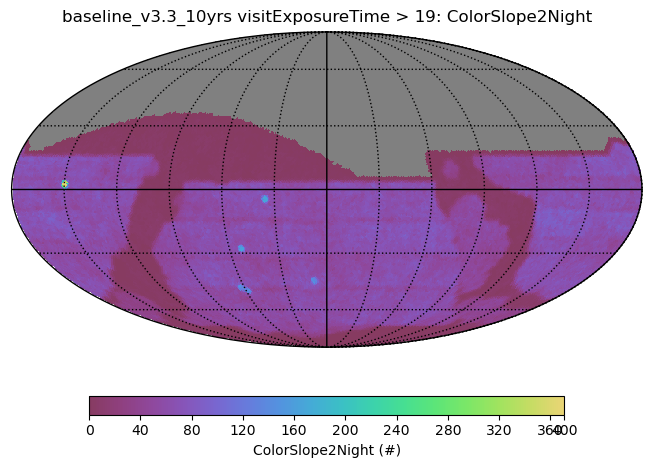

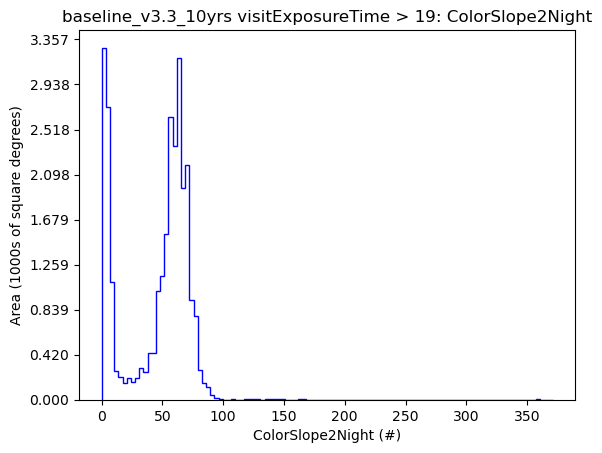

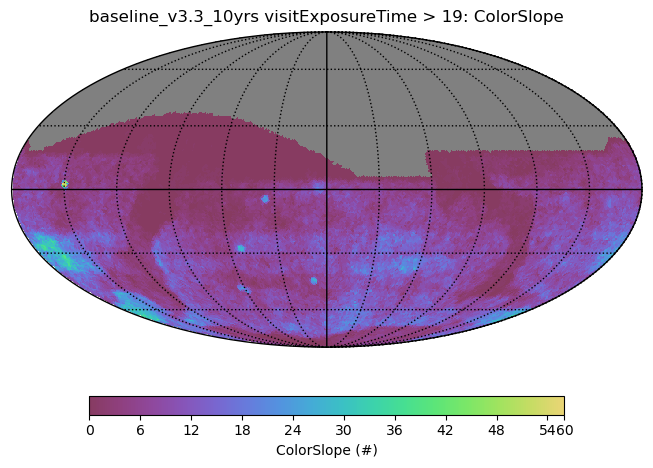

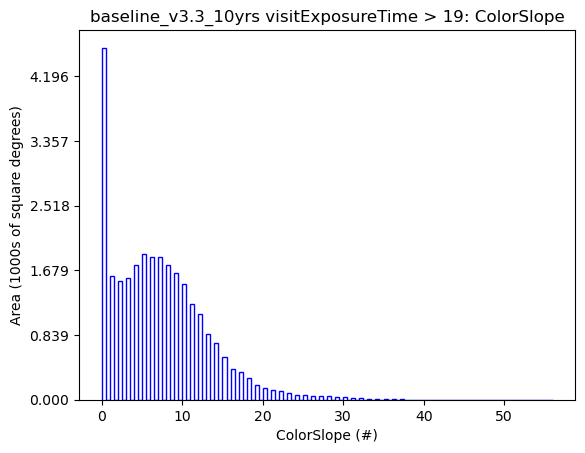

In [4]:
bundle_list = []

metric = maf.ColorSlope2NightMetric()
# Select all the visits. Could do something like 'filter="r"' 
sql = 'visitExposureTime > 19'
slicer = maf.slicers.HealpixSlicer(nside=64)
plot_dict = {}
bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name, plot_dict=plot_dict))

metric = maf.ColorSlopeMetric()
bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name, plot_dict=plot_dict))


bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, out_dir=out_dir, results_db=results_db)
bg.run_all()
bg.plot_all(closefigs=False)

In [5]:
bundle_list[0].metric_values.mean()

44.87067476624382

In [6]:
nights = np.arange(10)

In [7]:
nights

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.ceil(nights/2)

array([0., 1., 1., 2., 2., 3., 3., 4., 4., 5.])

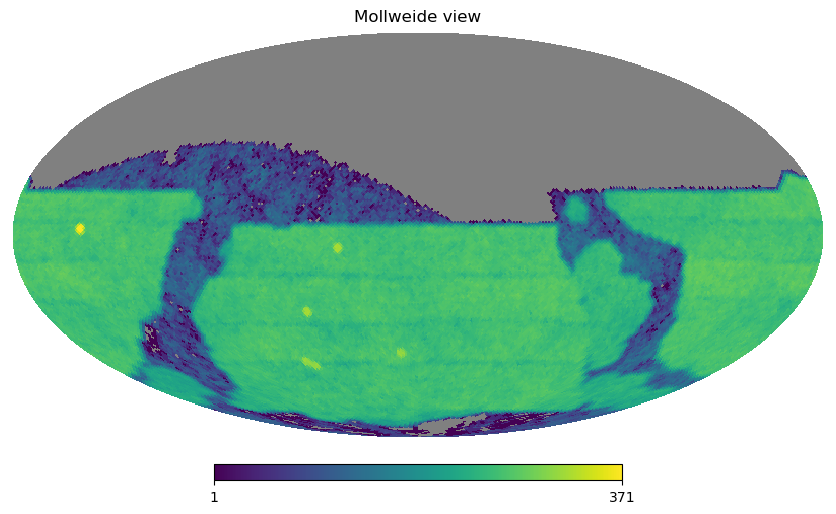

In [9]:
hp.mollview(bundle_list[0].metric_values, min=1, norm='log')

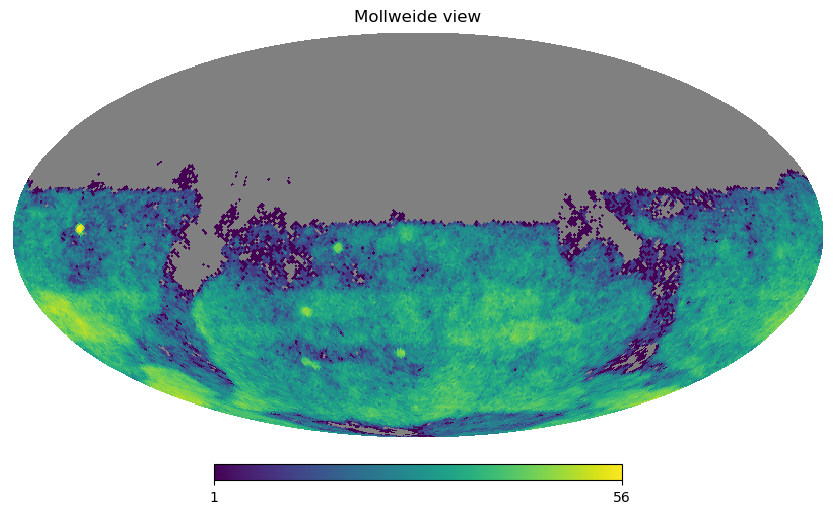

In [10]:
hp.mollview(bundle_list[1].metric_values, min=1, norm='log')